In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
import sys
import pandas as pd
sys.path.append('../../param_search')
import param_search as ps

In [3]:
# define a job template and name format
template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -x v034
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
module load anaconda3
conda activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/4DCT
nvidia-smi

mpirun -n 1 python ../../../train1d.py \\
    --out_name {job_name} \\
    --pde_name {pde_name} \\
    --image_size {image_size} \\
    --batch_size {batch_size} \\
    --n_nodes {n_nodes}

echo Done
'''
name_format = 'train1d_{pde_name}_{image_size}_{n_nodes}_{batch_size}'

In [4]:
param_space = ps.ParamSpace(
    pde_name='poisson',
    image_size=[128, 256, 512, 1024],
    n_nodes=[128, 256, 512, 1024],
    batch_size=[64, 128, 256],
)

for p in param_space:
    print(name_format.format(**p))
    
print(len(param_space))

train1d_poisson_128_128_64
train1d_poisson_128_128_128
train1d_poisson_128_128_256
train1d_poisson_128_256_64
train1d_poisson_128_256_128
train1d_poisson_128_256_256
train1d_poisson_128_512_64
train1d_poisson_128_512_128
train1d_poisson_128_512_256
train1d_poisson_128_1024_64
train1d_poisson_128_1024_128
train1d_poisson_128_1024_256
train1d_poisson_256_128_64
train1d_poisson_256_128_128
train1d_poisson_256_128_256
train1d_poisson_256_256_64
train1d_poisson_256_256_128
train1d_poisson_256_256_256
train1d_poisson_256_512_64
train1d_poisson_256_512_128
train1d_poisson_256_512_256
train1d_poisson_256_1024_64
train1d_poisson_256_1024_128
train1d_poisson_256_1024_256
train1d_poisson_512_128_64
train1d_poisson_512_128_128
train1d_poisson_512_128_256
train1d_poisson_512_256_64
train1d_poisson_512_256_128
train1d_poisson_512_256_256
train1d_poisson_512_512_64
train1d_poisson_512_512_128
train1d_poisson_512_512_256
train1d_poisson_512_1024_64
train1d_poisson_512_1024_128
train1d_poisson_512_1024

In [5]:
expt_name = '2024-03-09_poisson'

In [ ]:
jobs = ps.submit(template, name_format, param_space, work_dir=expt_name)
jobs.to_csv(f'{expt_name}.jobs')
jobs

In [57]:
jobs = pd.read_csv(f'{expt_name}.jobs', index_col=0)
status = ps.status(jobs, parse_stderr=True)
status

,index,pde_name,image_size,n_nodes,batch_size,job_name,partition,job_state,node_id,runtime,work_dir,array_idx,stdout,stderr
job_id,,,,,,,,,,,,,,
22862840,0,poisson,128,128,64,train1d_poisson_128_128_64,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v032.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22862841,1,poisson,128,128,128,train1d_poisson_128_128_128,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22862842,2,poisson,128,128,256,train1d_poisson_128_128_256,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
22862843,3,poisson,128,256,64,train1d_poisson_128_256_64,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,ValueError: x and y must have same first dimen...
22862844,4,poisson,128,256,128,train1d_poisson_128_256_128,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,ValueError: x and y must have same first dimen...
22862845,5,poisson,128,256,256,train1d_poisson_128_256_256,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,ValueError: x and y must have same first dimen...
22862846,6,poisson,128,512,64,train1d_poisson_128_512_64,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,ValueError: x and y must have same first dimen...
22862847,7,poisson,128,512,128,train1d_poisson_128_512_128,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v031.ib.bridges2.psc.edu\n/ocean/projects/asc1...,ValueError: x and y must have same first dimen...
22862848,8,poisson,128,512,256,train1d_poisson_128_512_256,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v033.ib.bridges2.psc.edu\n/ocean/projects/asc1...,ValueError: x and y must have same first dimen...


In [73]:
status['job_state'] = status['job_state'].fillna('DONE')
status.groupby(['job_state', 'image_size', 'n_nodes', 'stderr'])[['job_name']].count()

job_name
job_state image_size n_nodes stderr                                                      
DONE      128        128                                                                3
                     256     ValueError: x and y must have same first dimens...         3
                     512     ValueError: x and y must have same first dimens...         3
                     1024    ValueError: x and y must have same first dimens...         3
          256        128     ValueError: x and y must have same first dimens...         3
                     256                                                                3
                     512     ValueError: x and y must have same first dimens...         3
                     1024    ValueError: x and y must have same first dimens...         3
          512        128     ValueError: x and y must have same first dimens...         3
                     256     ValueError: x and y must have same first dimens...         3
                     512                                                                3
                     1024    ValueError: x and y must have same first dimens...         3
          1024       128     ValueError: x and y must have same first dimens...         3
                     256     ValueError: x and y must have same first dimens...         3
                     512     ValueError: x and y must have same first dimens...         3
                     1024                                                               3

In [24]:
print(status.iloc[0].stderr)

--------------------------------------------------------------------------

  Local host:   v032
  Local device: mlx5_1
--------------------------------------------------------------------------
/ocean/projects/asc170022p/mtragoza/mambaforge/envs/4DCT/lib/python3.10/site-packages/torch/nn/modules/conv.py:303: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1708025831440/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv1d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
/ocean/projects/asc170022p/mtragoza/lung-project/mycode/output.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(n_p

## Analyze results

In [26]:
m = ps.metrics(jobs, sep='\t')
m

,pde_name,image_size,n_nodes,batch_size,job_name,job_id,partition,job_state,node_id,runtime,work_dir,array_idx,epoch,phase,u_loss,mu_loss,t_model,t_loss,t_grad,t_optim
0,poisson,128,128,64,train1d_poisson_128_128_64,22862840,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.000000,train,0.016430,2.049032,7.868733,0.505905,5.849116,0.859969
1,poisson,128,128,64,train1d_poisson_128_128_64,22862840,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.007092,train,0.015566,1.929610,0.215844,0.021650,0.811380,0.000512
2,poisson,128,128,64,train1d_poisson_128_128_64,22862840,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.014184,train,0.016926,2.178298,0.219037,0.000727,0.657696,0.000650
3,poisson,128,128,64,train1d_poisson_128_128_64,22862840,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.021277,train,0.015732,1.983764,0.193429,0.000535,0.619238,0.000596
4,poisson,128,128,64,train1d_poisson_128_128_64,22862840,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,0.028369,train,0.013350,1.614246,0.218841,0.000586,0.663180,0.000544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113707,poisson,1024,1024,256,train1d_poisson_1024_1024_256,22862887,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,99.972222,train,0.003251,0.557924,0.175616,0.001821,0.439843,0.000491
113708,poisson,1024,1024,256,train1d_poisson_1024_1024_256,22862887,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,100.000000,test,0.003229,0.529584,1.133949,0.000483,NaN,NaN
113709,poisson,1024,1024,256,train1d_poisson_1024_1024_256,22862887,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,100.000000,test,0.002828,0.445592,1.136810,0.000163,NaN,NaN
113710,poisson,1024,1024,256,train1d_poisson_1024_1024_256,22862887,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,100.000000,test,0.003540,0.646443,1.136855,0.000165,NaN,NaN


In [29]:
m.groupby(['pde_name', 'image_size', 'n_nodes', 'batch_size', 'job_name'])[['epoch']].describe()

epoch  \
                                                                        count   
pde_name image_size n_nodes batch_size job_name                                 
poisson  128        128     64         train1d_poisson_128_128_64     15700.0   
                            128        train1d_poisson_128_128_128     7900.0   
                            256        train1d_poisson_128_128_256     4000.0   
                    256     64         train1d_poisson_128_256_64       157.0   
                            128        train1d_poisson_128_256_128       79.0   
                            256        train1d_poisson_128_256_256       40.0   
                    512     64         train1d_poisson_128_512_64       157.0   
                            128        train1d_poisson_128_512_128       79.0   
                            256        train1d_poisson_128_512_256       40.0   
                    1024    64         train1d_poisson_128_1024_64      157.0   
                            128        train1d_poisson_128_1024_128      79.0   
                            256        train1d_poisson_128_1024_256      40.0   
         256        128     64         train1d_poisson_256_128_64       157.0   
                            128        train1d_poisson_256_128_128       79.0   
                            256        train1d_poisson_256_128_256       40.0   
                    256     64         train1d_poisson_256_256_64     15700.0   
                            128        train1d_poisson_256_256_128     7900.0   
                            256        train1d_poisson_256_256_256     4000.0   
                    512     64         train1d_poisson_256_512_64       157.0   
                            128        train1d_poisson_256_512_128       79.0   
                            256        train1d_poisson_256_512_256       40.0   
                    1024    64         train1d_poisson_256_1024_64      157.0   
                            128        train1d_poisson_256_1024_128      79.0   
                            256        train1d_poisson_256_1024_256      40.0   
         512        128     64         train1d_poisson_512_128_64       157.0   
                            128        train1d_poisson_512_128_128       79.0   
                            256        train1d_poisson_512_128_256       40.0   
                    256     64         train1d_poisson_512_256_64       157.0   
                            128        train1d_poisson_512_256_128       79.0   
                            256        train1d_poisson_512_256_256       40.0   
                    512     64         train1d_poisson_512_512_64     15700.0   
                            128        train1d_poisson_512_512_128     7900.0   
                            256        train1d_poisson_512_512_256     4000.0   
                    1024    64         train1d_poisson_512_1024_64      157.0   
                            128        train1d_poisson_512_1024_128      79.0   
                            256        train1d_poisson_512_1024_256      40.0   
         1024       128     64         train1d_poisson_1024_128_64      157.0   
                            128        train1d_poisson_1024_128_128      79.0   
                            256        train1d_poisson_1024_128_256      40.0   
                    256     64         train1d_poisson_1024_256_64      157.0   
                            128        train1d_poisson_1024_256_128      79.0   
                            256        train1d_poisson_1024_256_256      40.0   
                    512     64         train1d_poisson_1024_512_64      157.0   
                            128        train1d_poisson_1024_512_128      79.0   
                            256        train1d_poisson_1024_512_256      40.0   
                    1024    64         train1d_poisson_1024_1024_64   15700.0   
                            128        train1d_poisson_1024_1024_128   7900.0   
                      

<IPython.core.display.Javascript object>


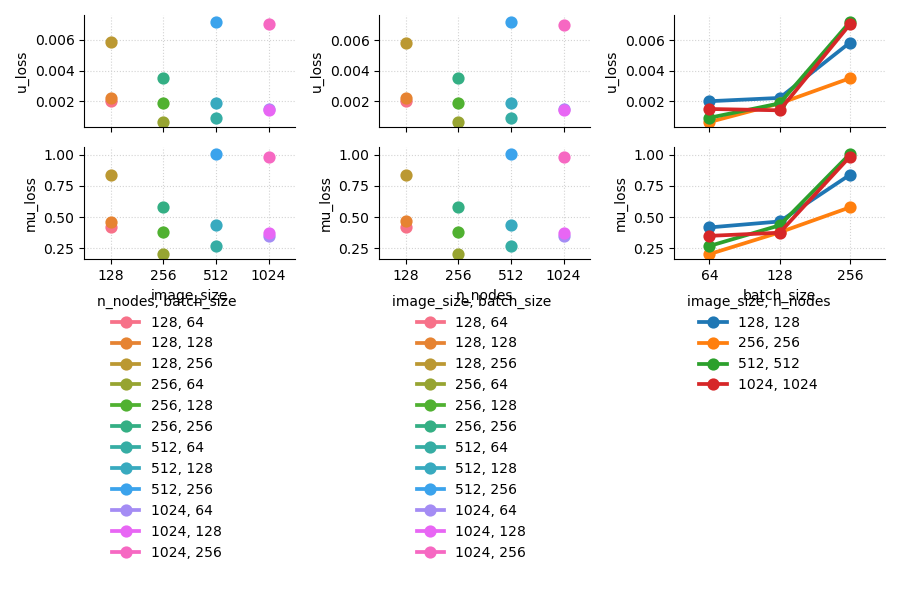

In [15]:
%autoreload
fig = ps.plot(
    m[(m.phase == 'train') & (m.epoch >= 40)],
    x=['image_size', 'n_nodes', 'batch_size'],
    y=['u_loss', 'mu_loss'],
    legend_kws=dict(bbox_to_anchor=(0, -0.2)),
    tight=True
)

In [ ]:
fig = ps.plot(
    m[(m.phase == 'test') & (m.epoch >= 40)],
    x=['image_size', 'n_nodes', 'batch_size'],
    y=['u_loss', 'mu_loss'],
    legend_kws=dict(bbox_to_anchor=(0, -0.2)),
    tight=True
)